In [113]:
import torch
import matplotlib.pyplot as plt

In [114]:
xs = torch.tensor([0,1,2,3,4,5,6,7])
ys = torch.tensor([1.96,1.31,0.98,0.78,0.63,0.53,0.46,0.41])

In [115]:
# z = wx+b 

def regression(rx,rw,rb):
    return rw * rx + rb

In [116]:
w = torch.tensor([0.9]).requires_grad_() # auto creation of the w slope
b = torch.tensor([0.5]).requires_grad_() # auto creation of the b intercept
print(w)

tensor([0.9000], requires_grad=True)


In [117]:
yhat = regression(xs,w,b)
yhat

tensor([0.5000, 1.4000, 2.3000, 3.2000, 4.1000, 5.0000, 5.9000, 6.8000],
       grad_fn=<AddBackward0>)

**Backward Propagation**: In backprop, the NN adjusts its parameters proportionate to the error in its guess. It does this by traversing backwards from the output, collecting the derivatives of the error-loss (C or modern $L$) with respect to the parameters of the functions (gradients), and optimizing the parameters using gradient descent. For a more detailed walkthrough of backprop, check out this video from 3Blue1Brown.
- https://www.youtube.com/watch?v=tIeHLnjs5U8


Mean Squared Error:

${L}(\hat{y}, y) = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2$

Binary Cross-Entropy:

${L}(\hat{y}, y) = -\left[ y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right]$

- Loss Functions 
    - https://builtin.com/machine-learning/common-loss-functions#:~:text=A%20loss%20function%20is%20a,model%20is%20at%20predicting%20outcomes.

In [118]:
def mse(ry_yhat, ry_y):
    sigma = torch.sum((ry_yhat - ry_y) ** 2)
    return sigma / len(ry_y)

In [119]:
C = mse(yhat,ys)
C

tensor(14.0232, grad_fn=<DivBackward0>)

In [120]:
C.backward()


In [121]:
C.item()

14.023249626159668

C.backward computes the gradients of the loss with respect to the parameters of the model. This is done using the chain rule of calculus, which allows us to compute the derivative of a composite function. The gradients are stored in the parameters' .grad attribute, as:

$$\frac{\partial \mathcal{L}}{\partial w}, \quad \frac{\partial \mathcal{L}}{\partial b}$$

and computed using the chain rule as:
$$\frac{d\mathcal{L}}{dw} = \frac{d\mathcal{L}}{d\hat{y}} \cdot \frac{dz}{dw}
\quad $$ 
since: $(\hat{y} = z)$

In [122]:
print(w.grad)

tensor([30.8975])


In [123]:
print(w)

tensor([0.9000], requires_grad=True)


In [124]:
print(b.grad)
print(b)

tensor([5.5350])
tensor([0.5000], requires_grad=True)


| step | meaning |
|------|---------|
| C=mse(...)    | Calculates the scalar loss value (C) |
| C.backward()  | Triggers the chain rule to compute gradients for all previous ops|
|w.grad, b.grad| Contains the slope of the loss with respect to each parameter | 


In [125]:
gradient = torch.tensor([[b.grad.item(), w.grad.item()]]).T
gradient

tensor([[ 5.5350],
        [30.8975]])

- In forward pass:
    - we add a bias offset (e.g., [-1, 2]) to shift the output i.e. learned position
- In backward pass: 
    - we calculate a gradient vector that tells how to update b, w i.e. steering direction

**Optimization** 
Bundling parameters into $\theta$, thus, 
|Concept|Notation|Explanation|
|-------|-------|-----------|
|Weights|$w$|The weights of the model, which are adjusted during training|
|Biases|$b$|The biases of the model, which are adjusted during training|
|Parameters|$\theta$|The parameters of the model, which include both weights and biases as a new vector|
|Gradient|$\nabla \mathcal{L}$|The gradient of the loss function with respect to the parameters, which indicates the direction and magnitude of change needed to minimize the loss|
|Nabla|$\nabla$|The symbol used to denote the gradient operator as container of all partial derivatives.|


In [126]:
C = mse(regression(xs,w,b), ys)


In [127]:
theta = torch.tensor([[b,w]]).T

In [128]:
theta

tensor([[0.5000],
        [0.9000]])

In [129]:
C

tensor(14.0232, grad_fn=<DivBackward0>)

In [130]:
def labeled_regression_plot(my_x, my_y, my_w, my_b, my_C, include_grad=True):
    
    title = 'Cost = {}'.format('%.3g' % my_C.item())
    if include_grad:
        xlabel = 'w = {}, w grad = {}'.format('%.3g' % my_w.item(), '%.3g' % my_w.grad.item())
        ylabel = 'b = {}, b grad = {}'.format('%.3g' % my_b.item(), '%.3g' % my_b.grad.item())
    else:
        xlabel = 'w = {}'.format('%.3g' % my_w.item())        
        ylabel = 'b = {}'.format('%.3g' % my_b.item())
    
    fig, ax = plt.subplots()
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    ax.scatter(my_x, my_y)
    
    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_w, my_b).detach().numpy()
    y_max = regression(x_max, my_w, my_b).detach().numpy()

    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max], c='C01')

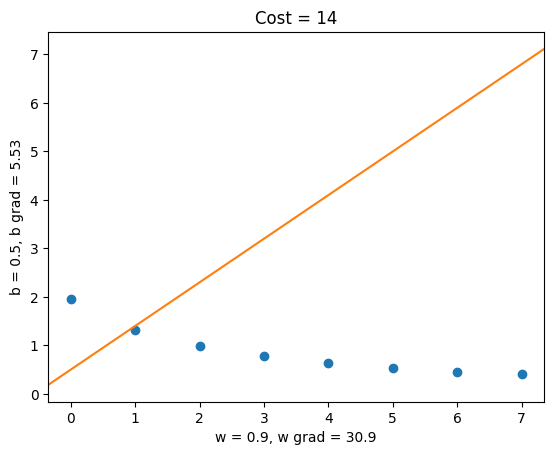

In [131]:
labeled_regression_plot(xs, ys, w, b, C)

In [132]:
lr = 0.01  # learning rate 

In [133]:
scaled_gradient = lr*gradient


In [134]:
scaled_gradient

tensor([[0.0553],
        [0.3090]])

In [135]:
new_theta = theta - scaled_gradient
new_theta

tensor([[0.4446],
        [0.5910]])

In [136]:
b= new_theta[0]
w= new_theta[1]

In [137]:
C = mse(regression(xs,w,b), ys)


In [138]:
C

tensor(5.9638)

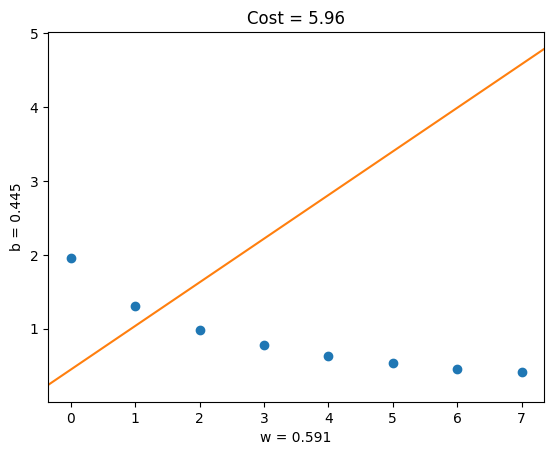

In [139]:
labeled_regression_plot(xs,ys,w,b,C, include_grad=False)

Epoch 0: Cost = 5.963756084442139, w = 0.5910249948501587, b = 0.44464999437332153
Epoch 1: Cost = 2.7029953002929688, w = 0.3940657377243042, b = 0.4120352566242218
Epoch 2: Cost = 1.3819093704223633, w = 0.2683252692222595, b = 0.39385995268821716
Epoch 3: Cost = 0.844870388507843, w = 0.1878662258386612, b = 0.38484999537467957
Epoch 4: Cost = 0.6247768998146057, w = 0.13619855046272278, b = 0.3816523551940918
Epoch 5: Cost = 0.5328267216682434, w = 0.10283839702606201, b = 0.38213542103767395
Epoch 6: Cost = 0.49270614981651306, w = 0.08112048357725143, b = 0.38494402170181274
Epoch 7: Cost = 0.4735690653324127, w = 0.06680723279714584, b = 0.38921672105789185
Epoch 8: Cost = 0.46294695138931274, w = 0.05720452964305878, b = 0.39440587162971497
Epoch 9: Cost = 0.45579978823661804, w = 0.050599534064531326, b = 0.4001634418964386
Epoch 10: Cost = 0.4500899910926819, w = 0.04590325430035591, b = 0.4062682092189789
Epoch 11: Cost = 0.44499364495277405, w = 0.04242334142327309, b = 0.4

/var/folders/jl/y_4hb2553llg1s2py_vpnp4w0000gn/T/ipykernel_62903/322307047.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


Epoch 34: Cost = 0.3500165045261383, w = 0.00930854119360447, b = 0.5565727949142456
Epoch 35: Cost = 0.34644243121147156, w = 0.008115455508232117, b = 0.5624397397041321
Epoch 36: Cost = 0.34290939569473267, w = 0.006929263472557068, b = 0.5682728886604309
Epoch 37: Cost = 0.3394169807434082, w = 0.005749918520450592, b = 0.5740723609924316
Epoch 38: Cost = 0.33596473932266235, w = 0.004577381536364555, b = 0.5798383951187134
Epoch 39: Cost = 0.3325521945953369, w = 0.003411609912291169, b = 0.5855712294578552
Epoch 40: Cost = 0.3291788697242737, w = 0.002252559643238783, b = 0.5912709832191467
Epoch 41: Cost = 0.32584434747695923, w = 0.0011001942912116647, b = 0.596937894821167
Epoch 42: Cost = 0.32254812121391296, w = -4.5526656322181225e-05, b = 0.6025721430778503
Epoch 43: Cost = 0.3192898631095886, w = -0.0011846426641568542, b = 0.6081739068031311
Epoch 44: Cost = 0.3160690367221832, w = -0.0023171918001025915, b = 0.6137433648109436
Epoch 45: Cost = 0.31288522481918335, w = -

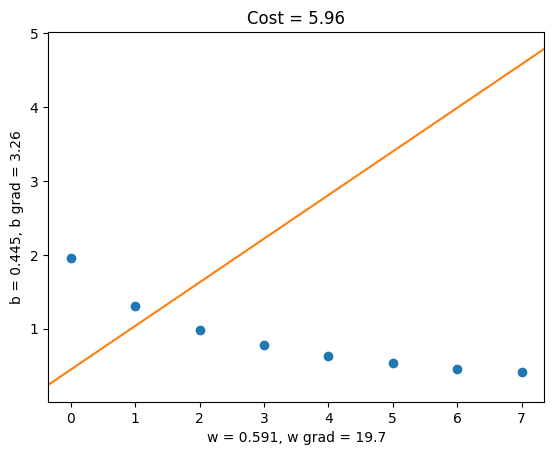

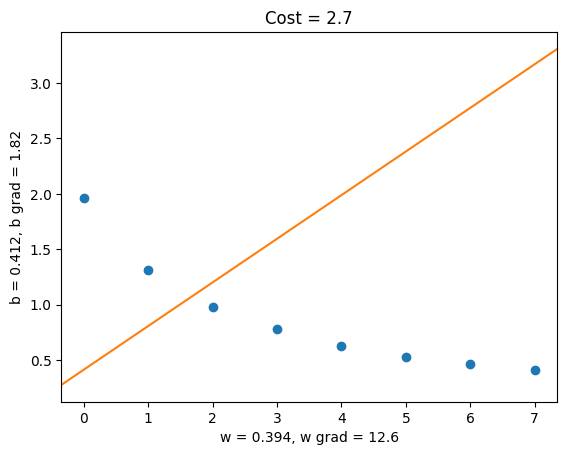

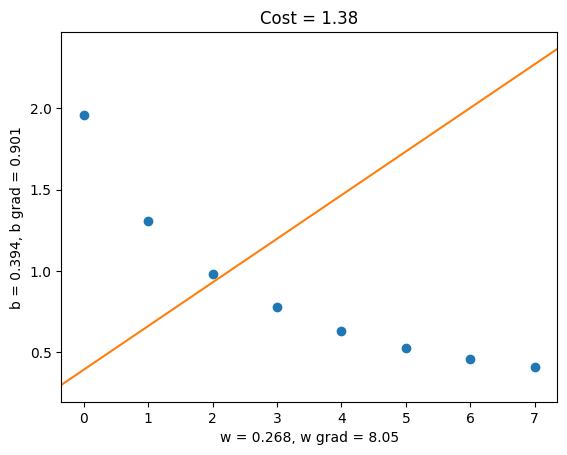

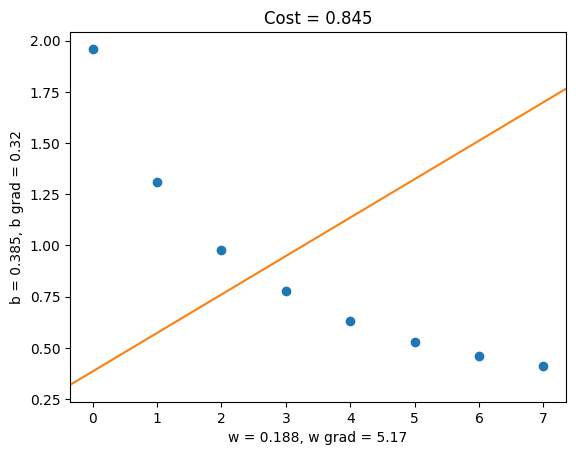

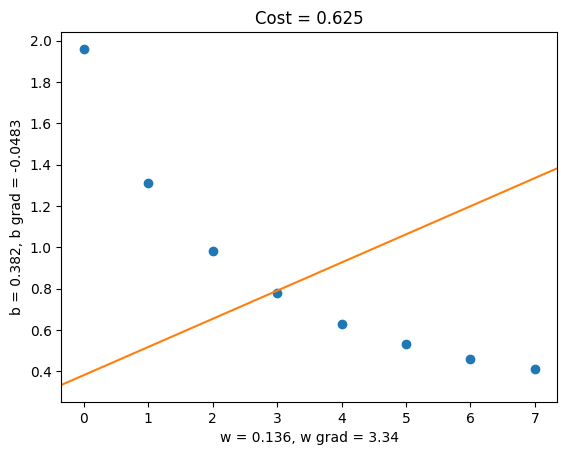

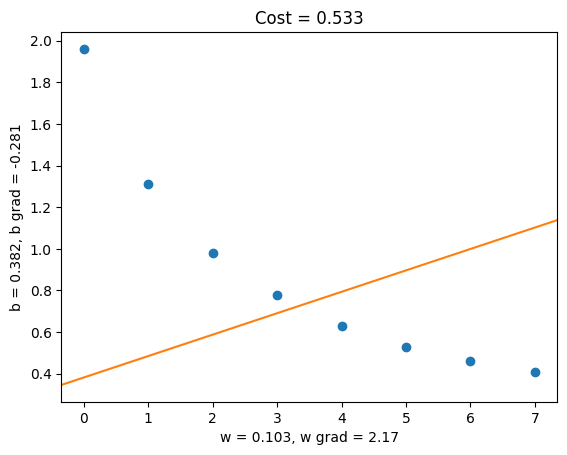

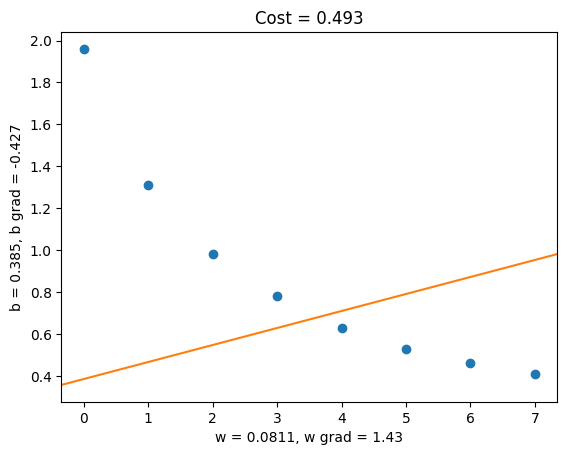

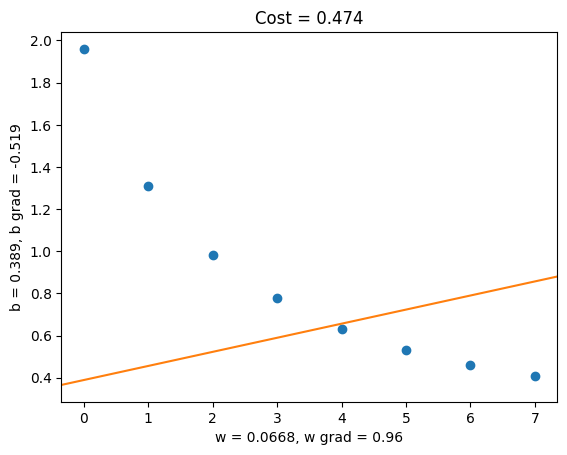

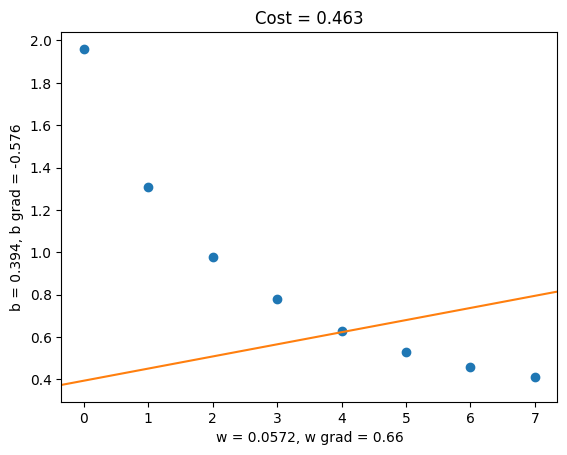

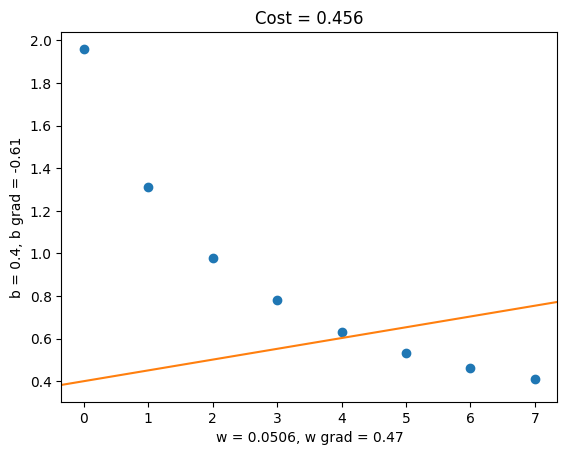

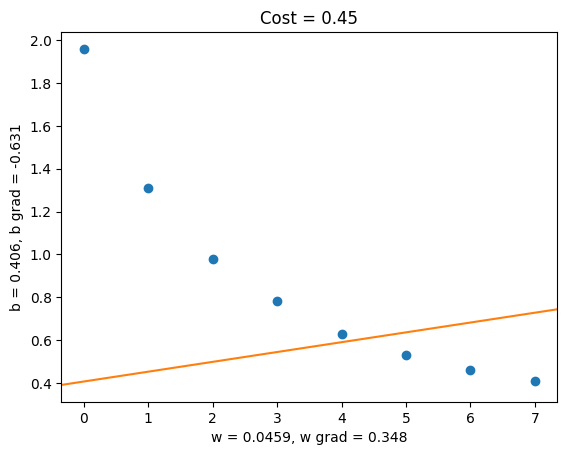

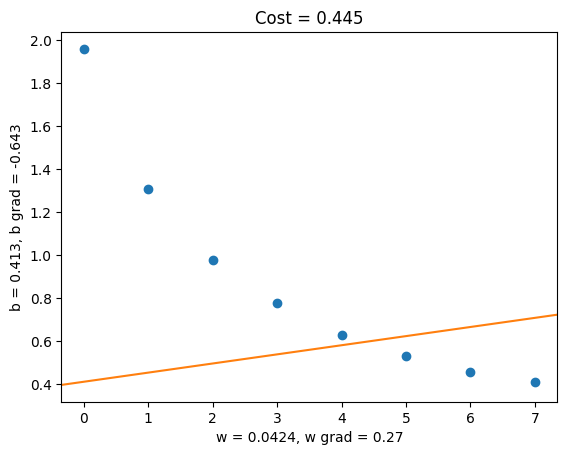

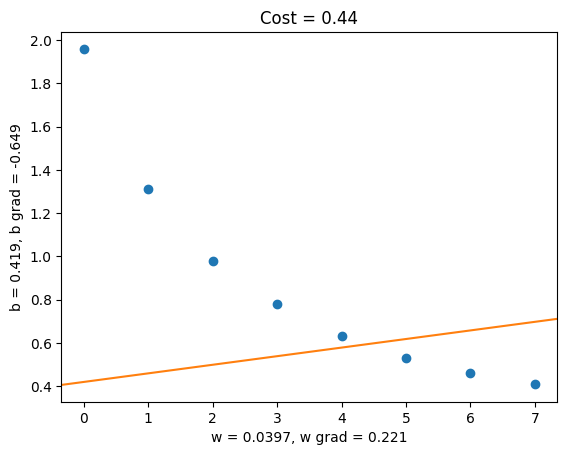

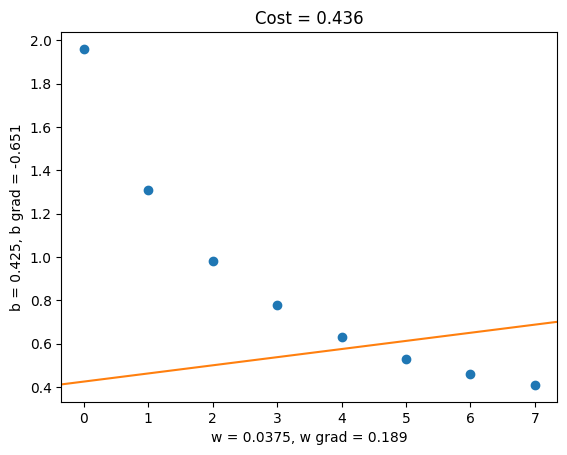

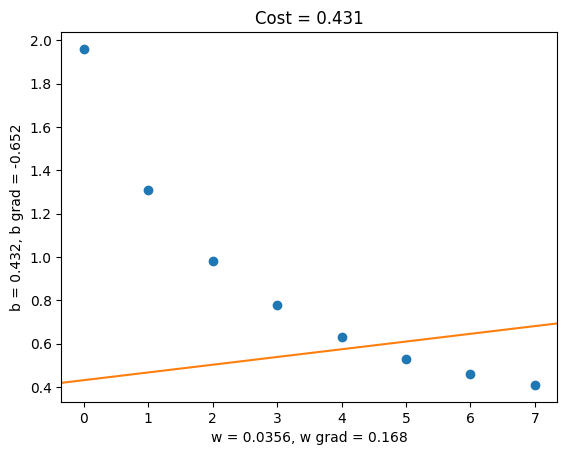

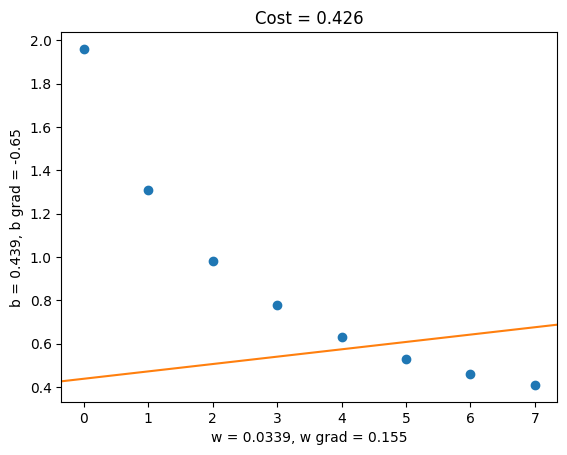

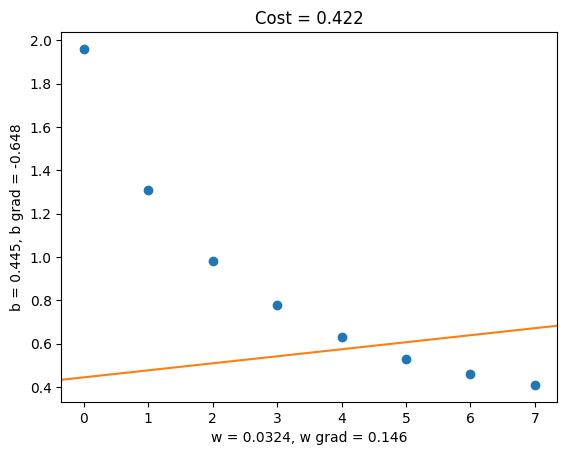

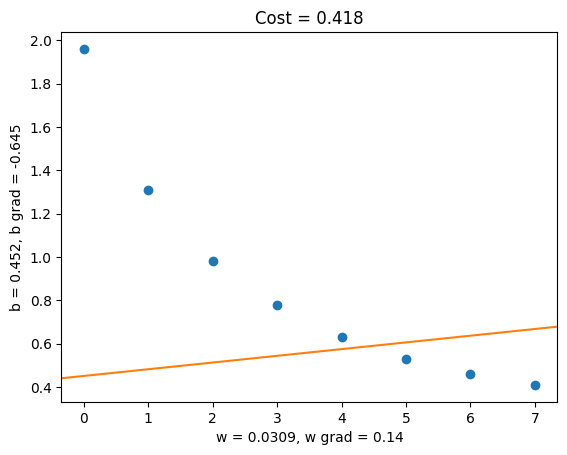

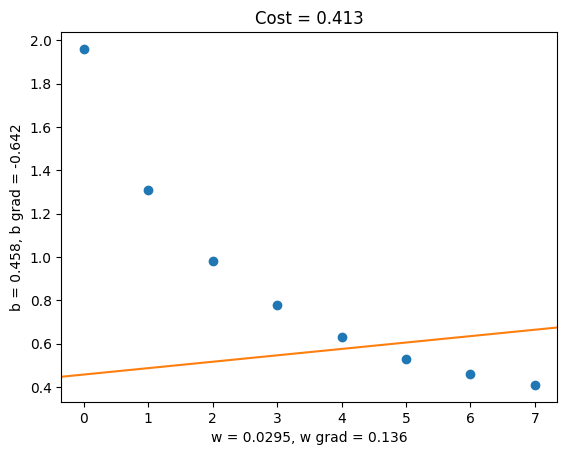

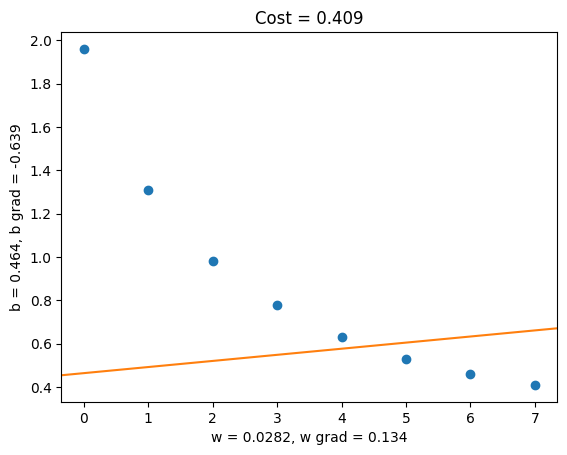

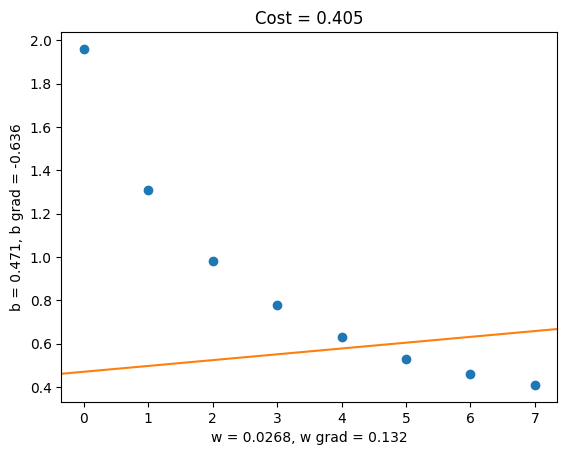

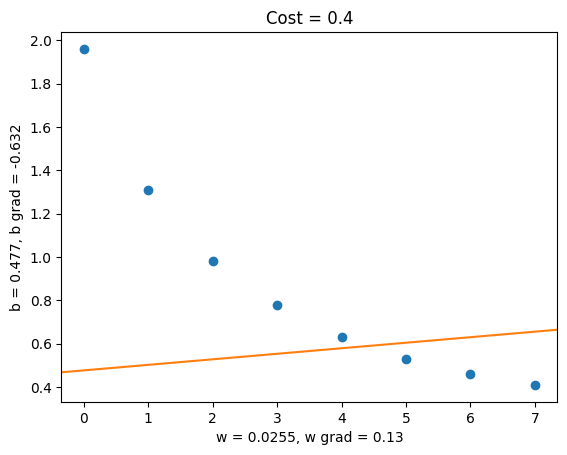

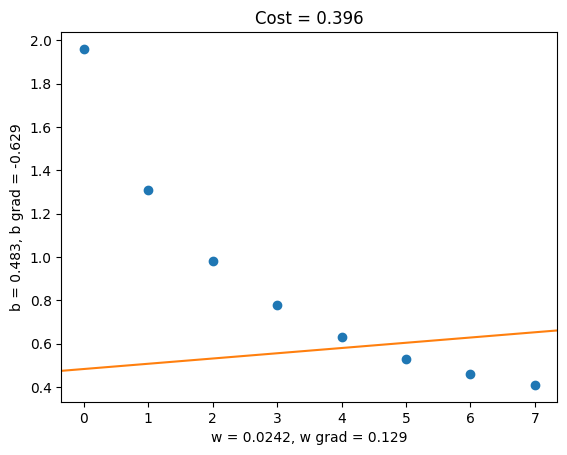

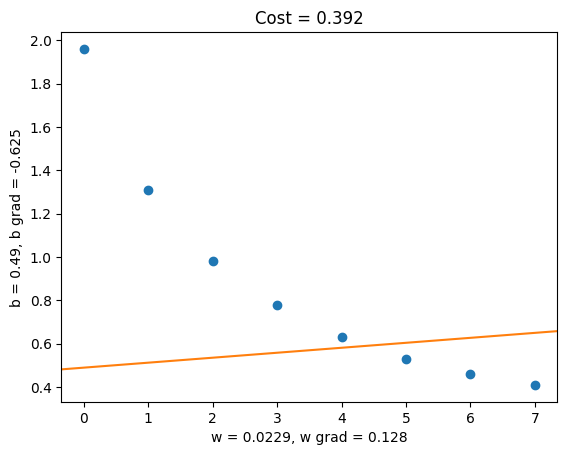

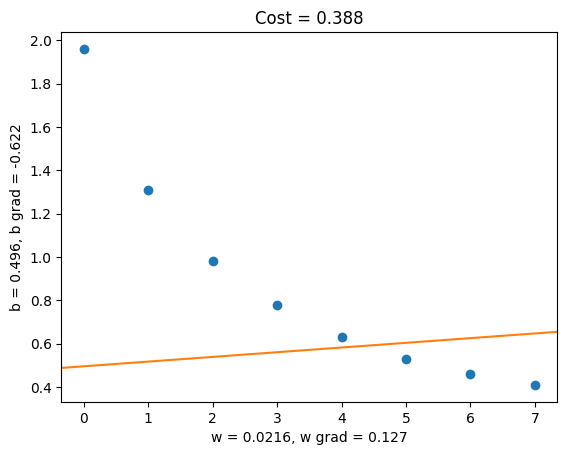

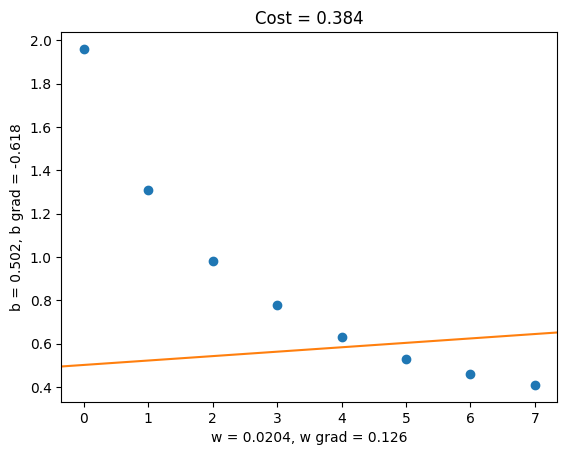

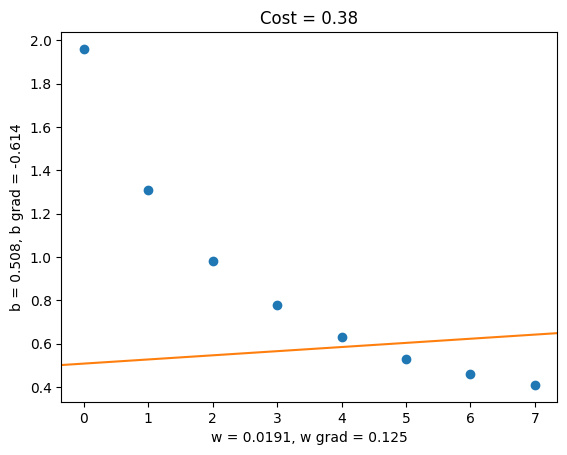

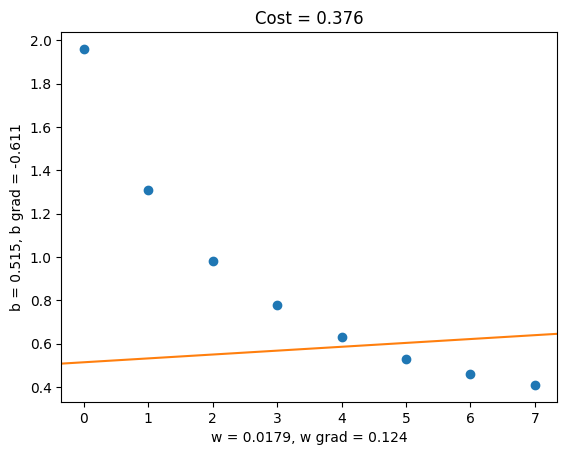

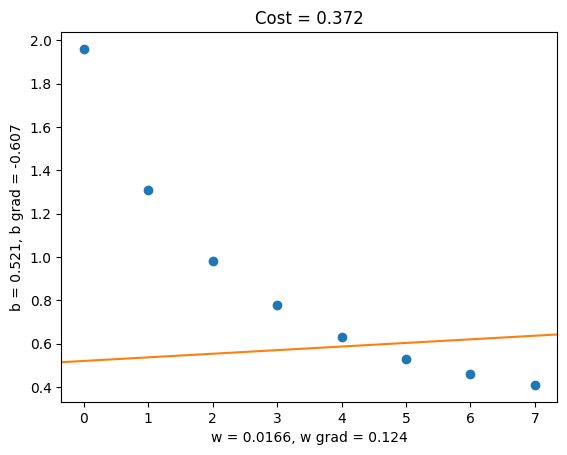

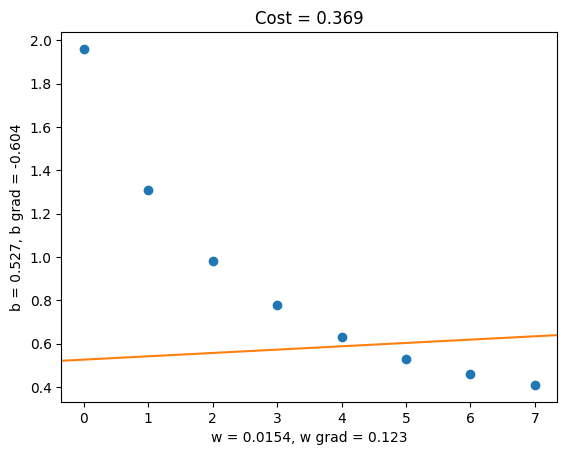

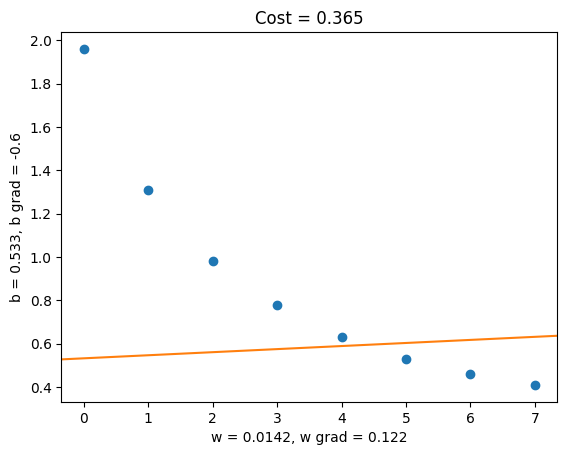

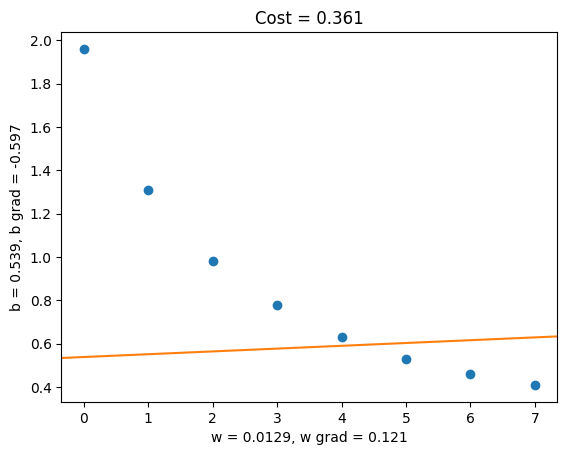

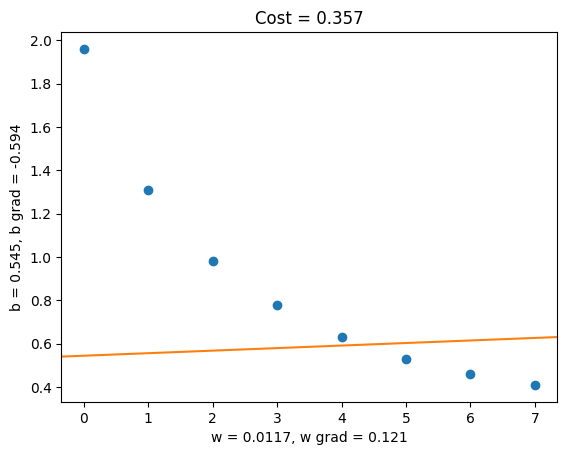

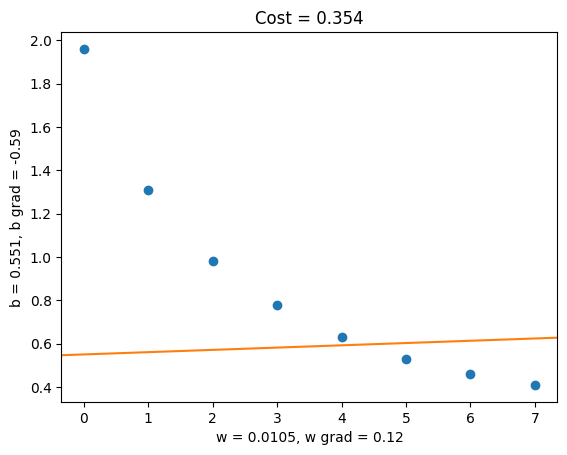

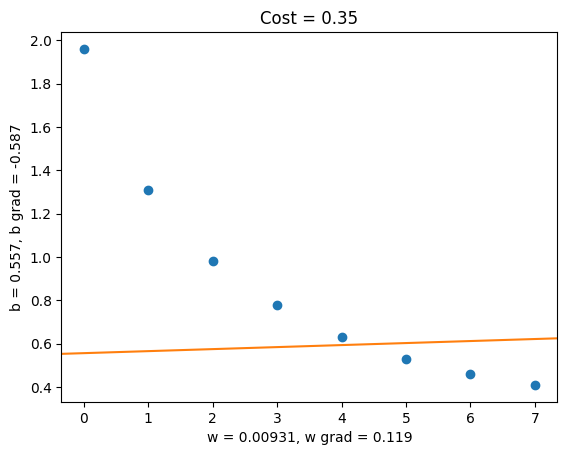

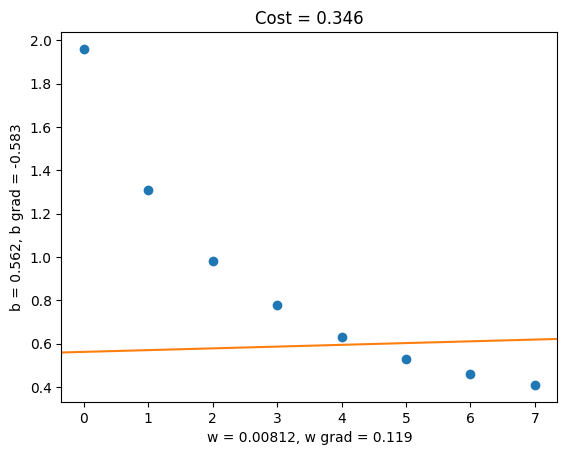

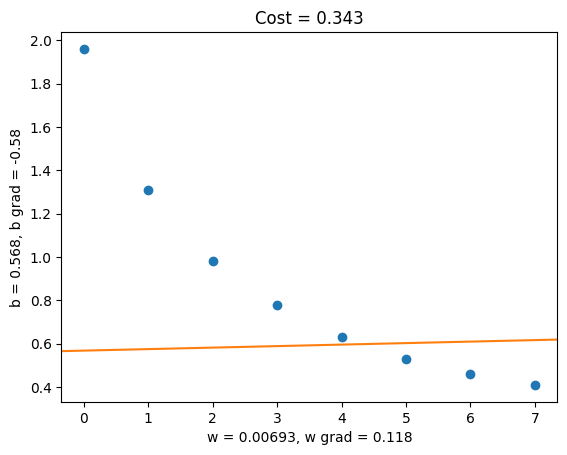

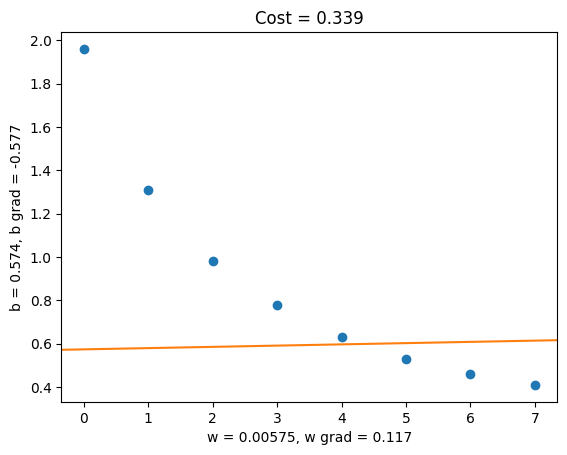

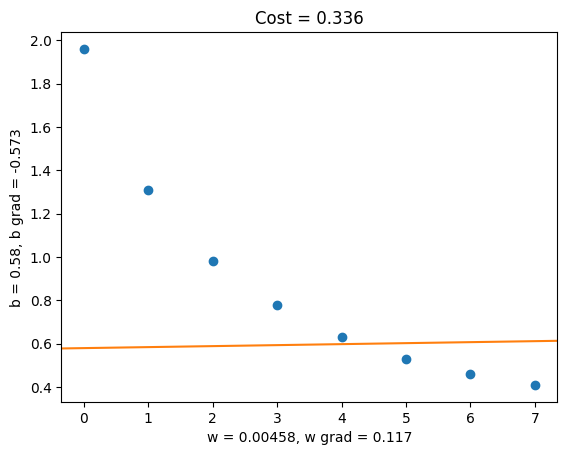

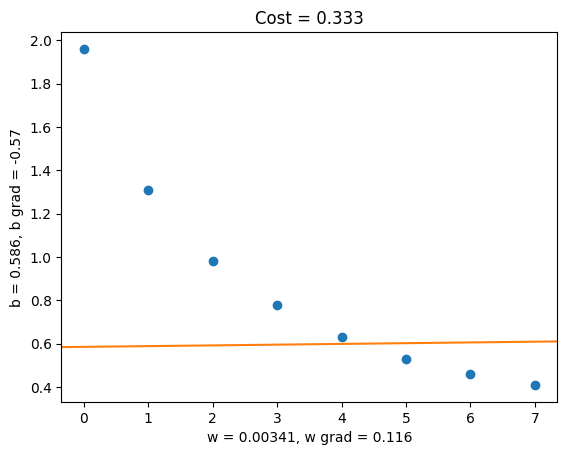

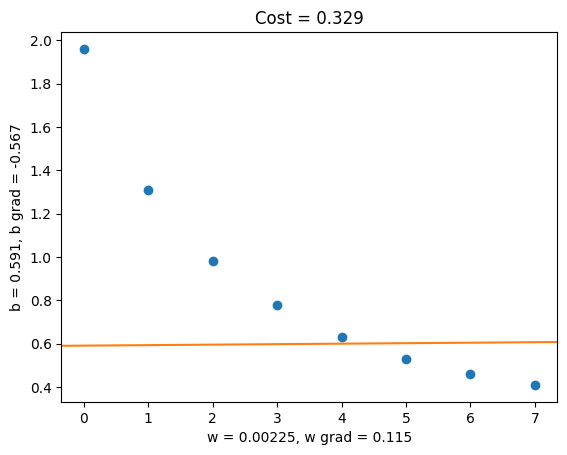

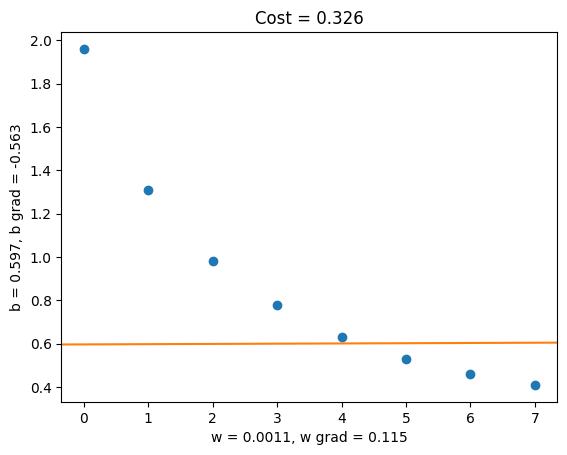

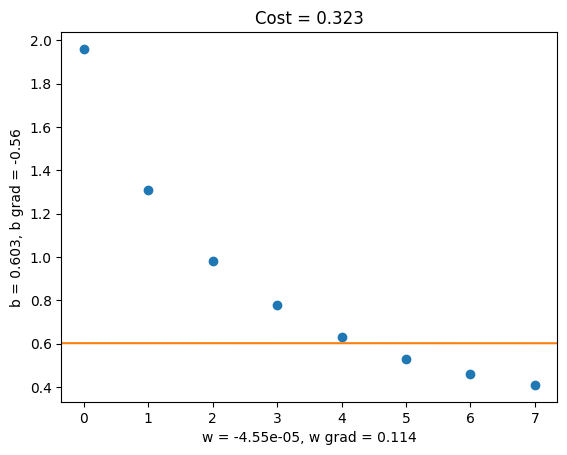

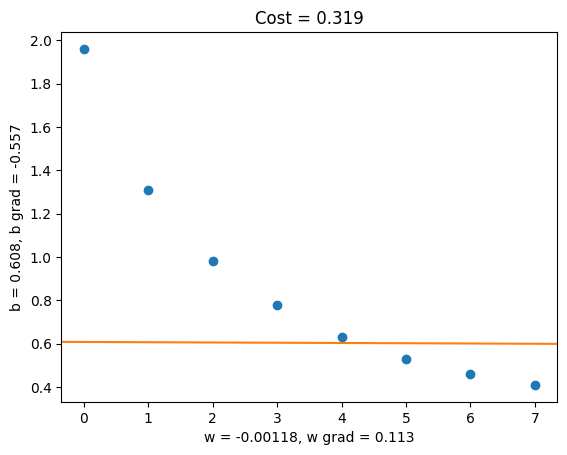

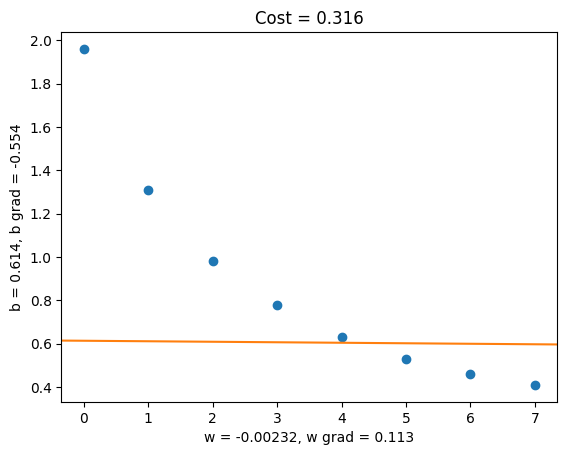

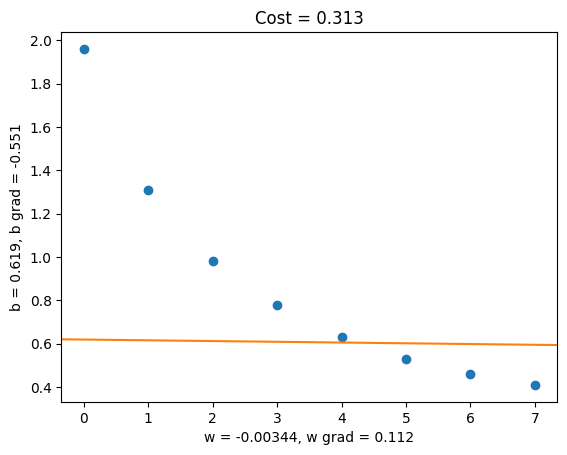

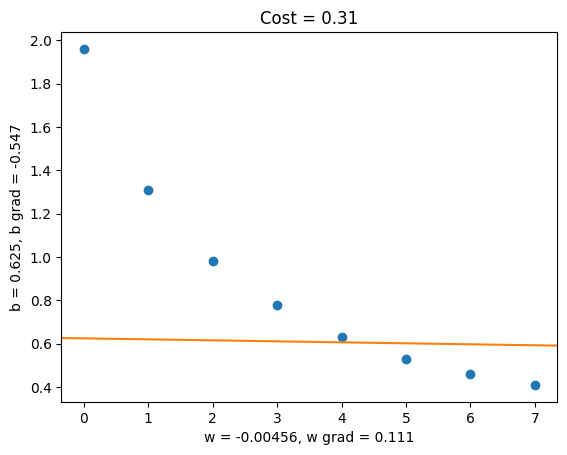

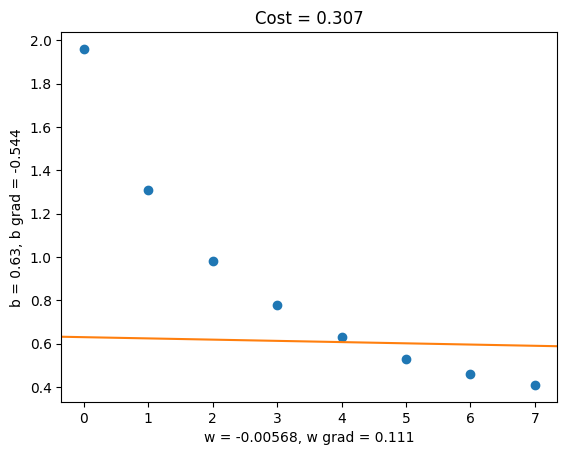

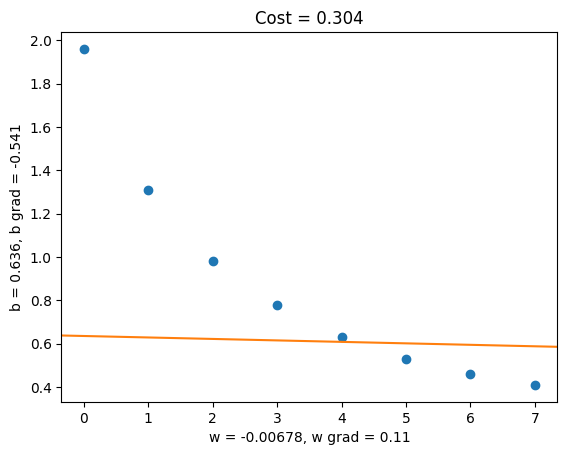

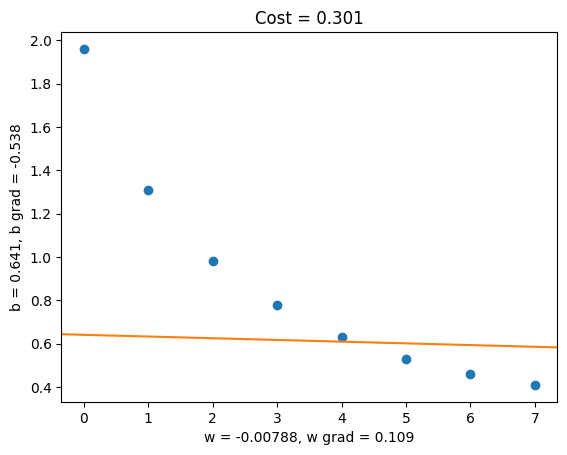

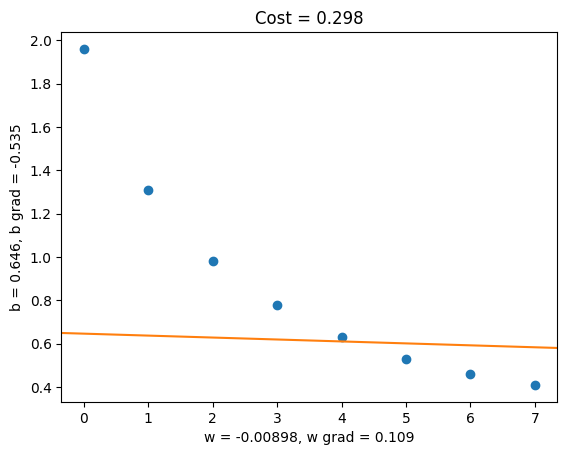

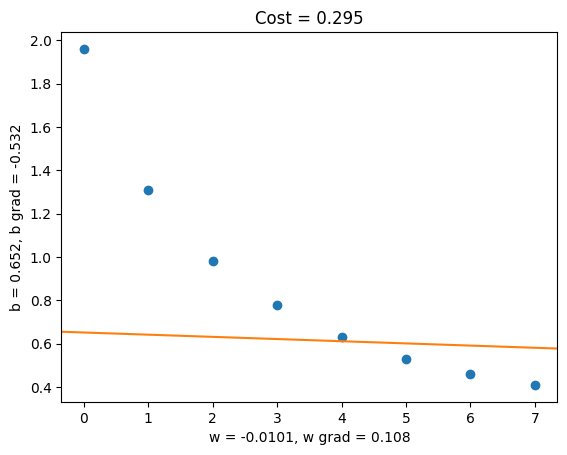

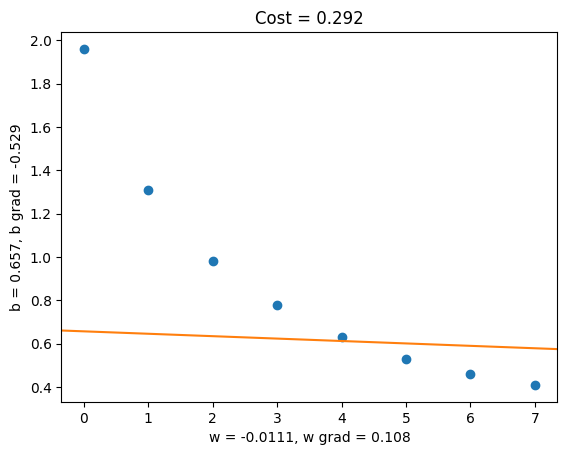

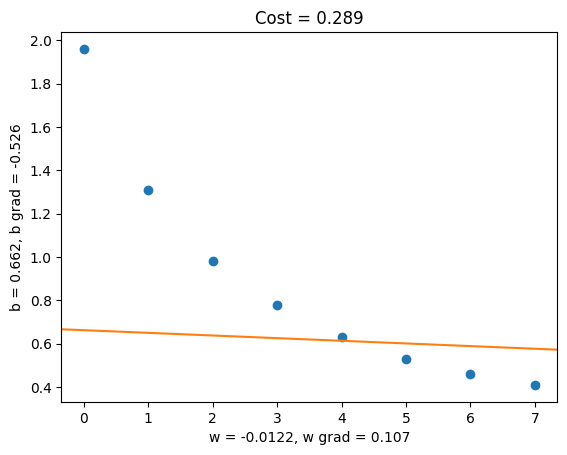

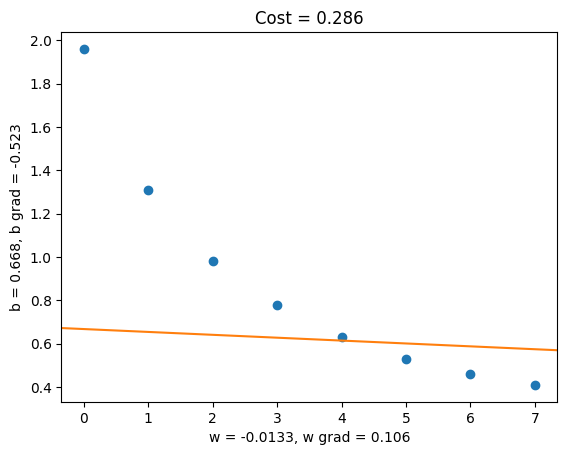

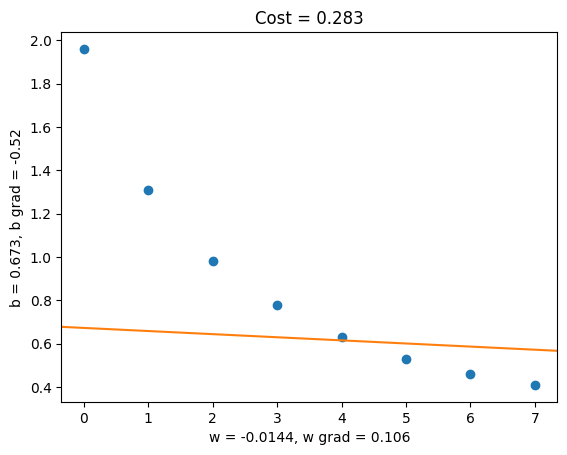

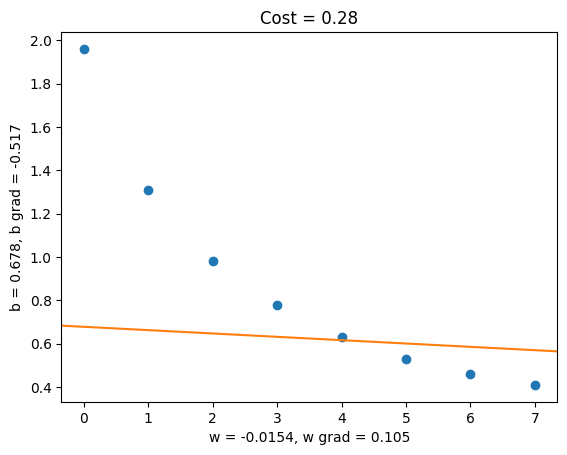

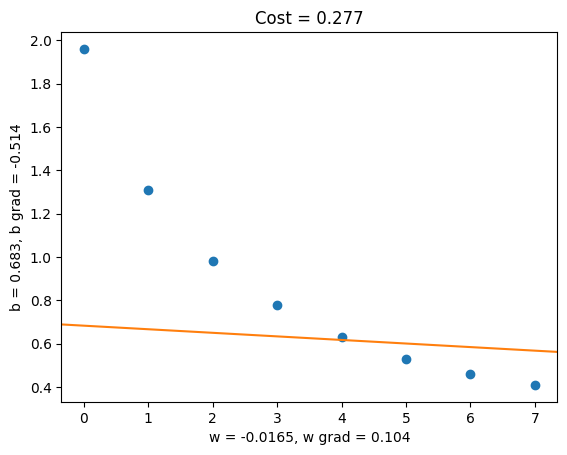

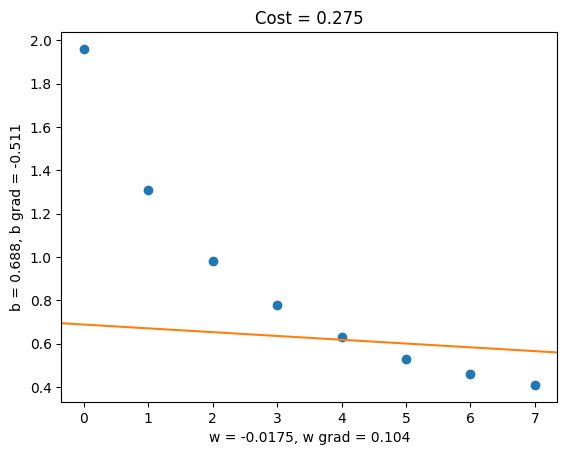

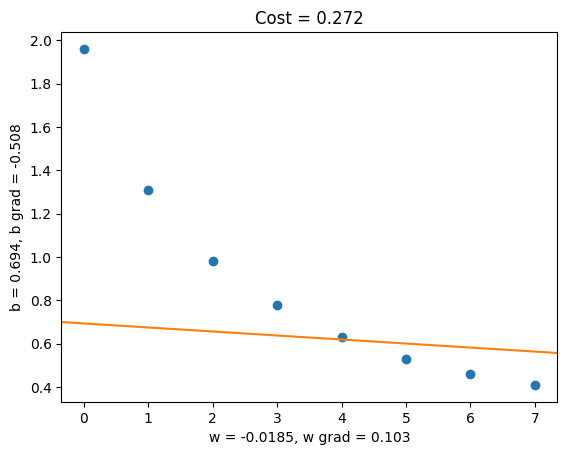

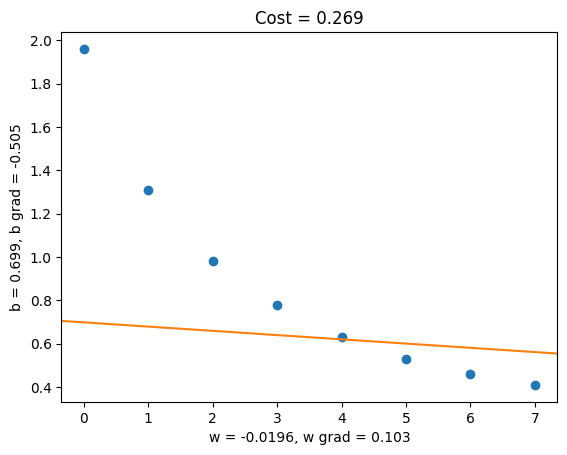

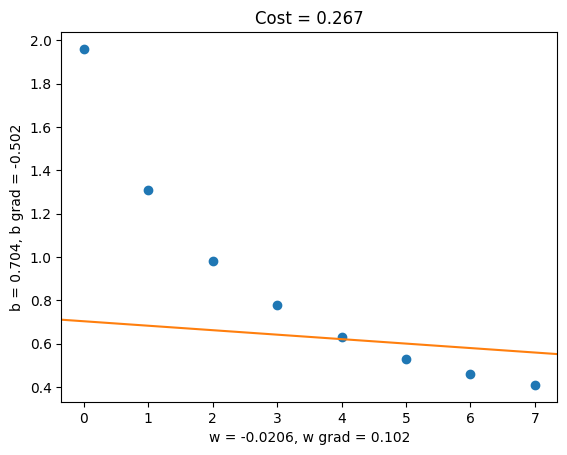

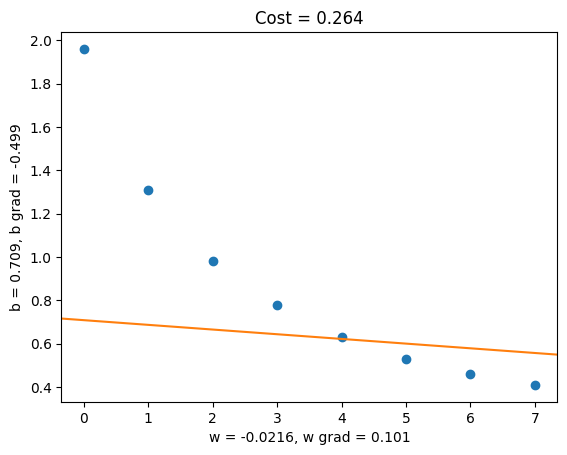

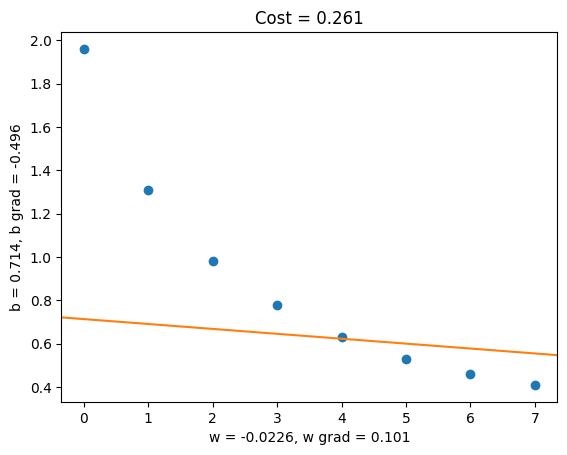

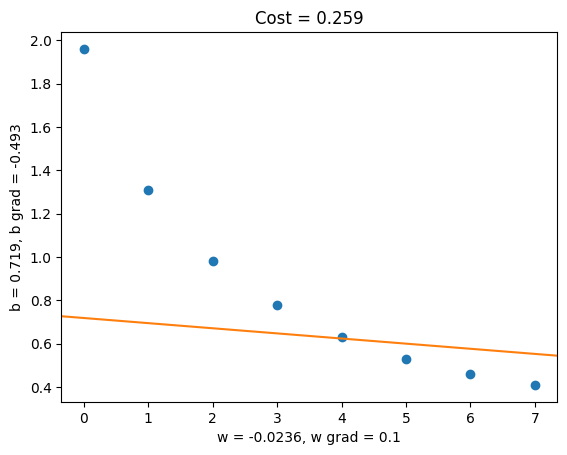

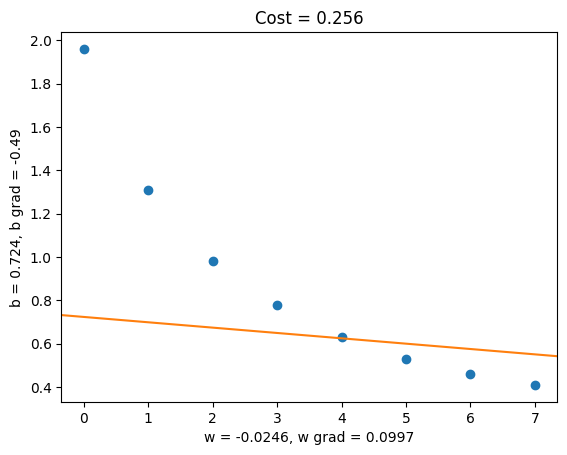

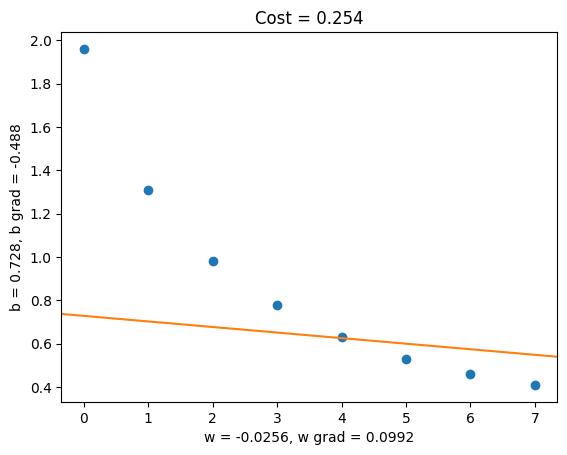

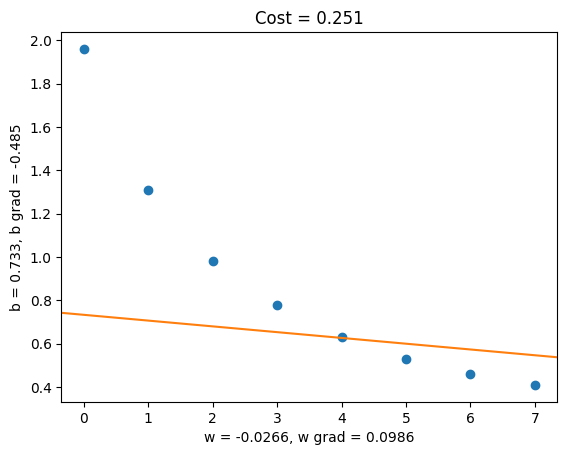

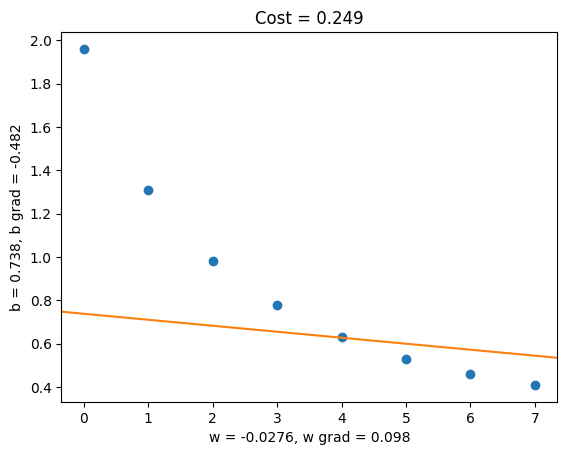

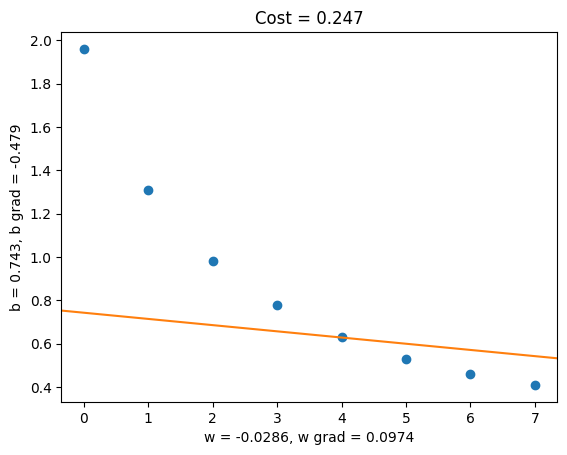

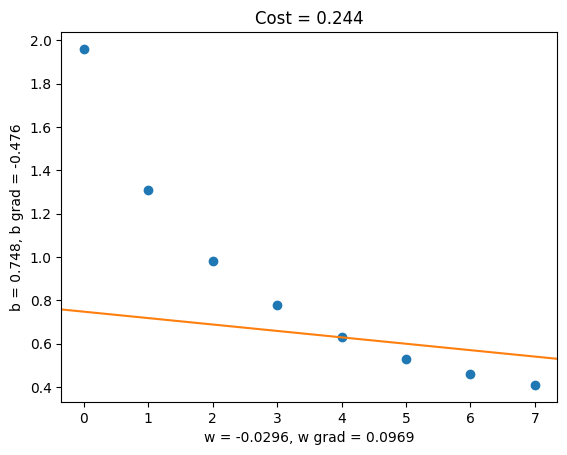

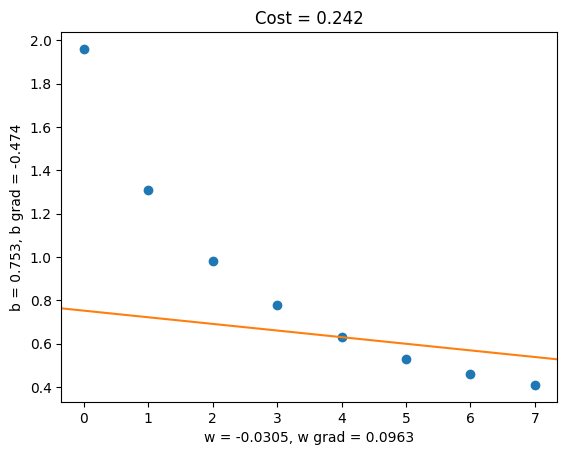

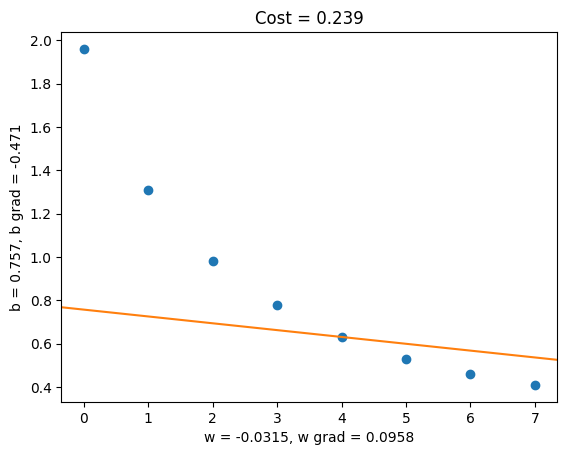

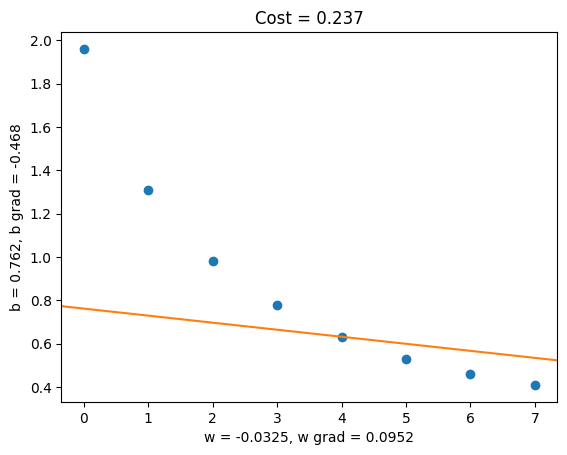

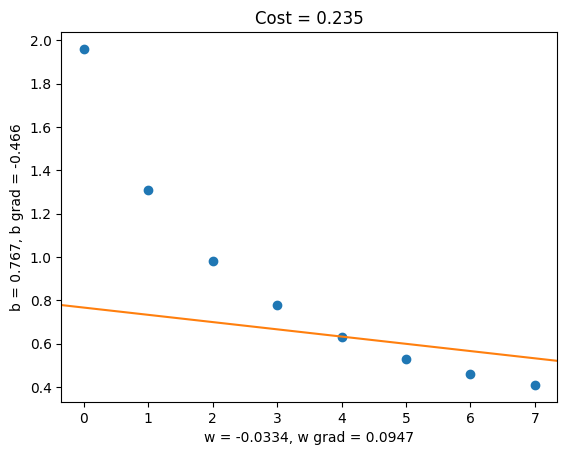

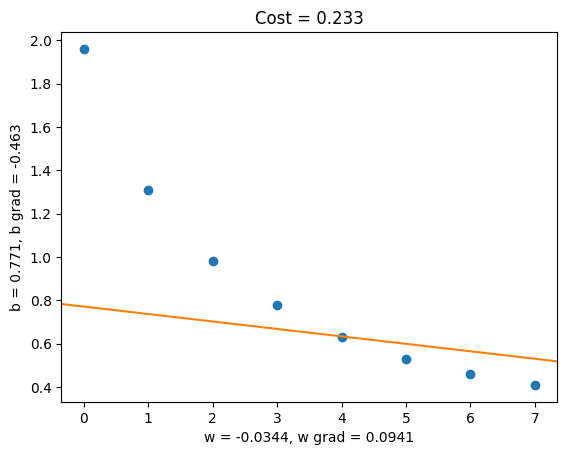

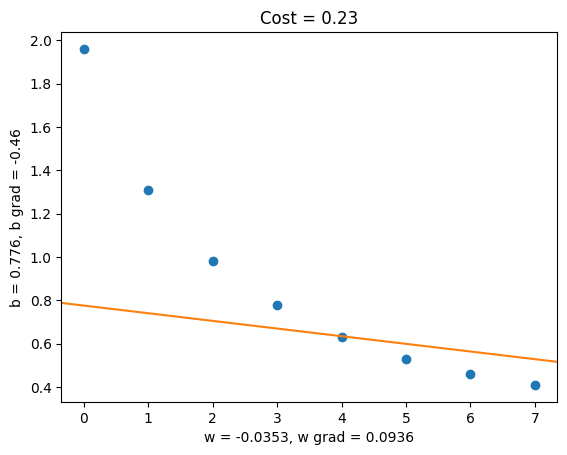

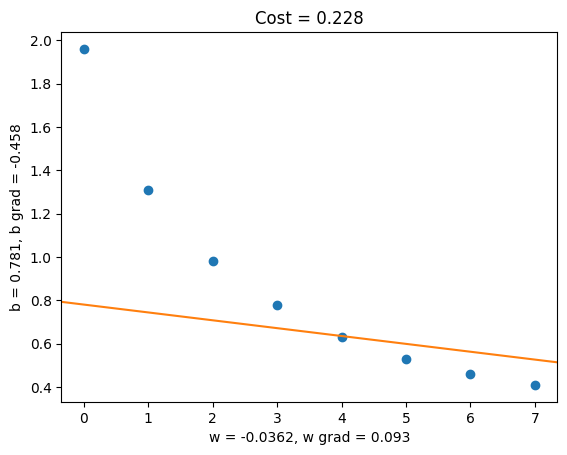

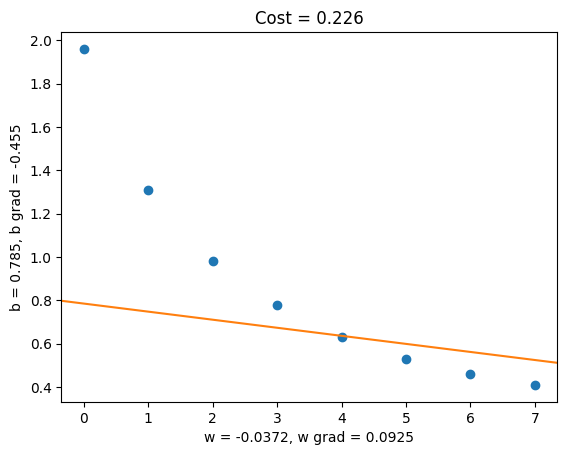

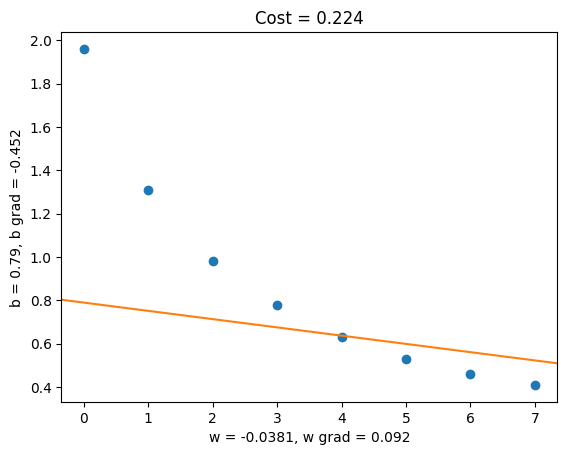

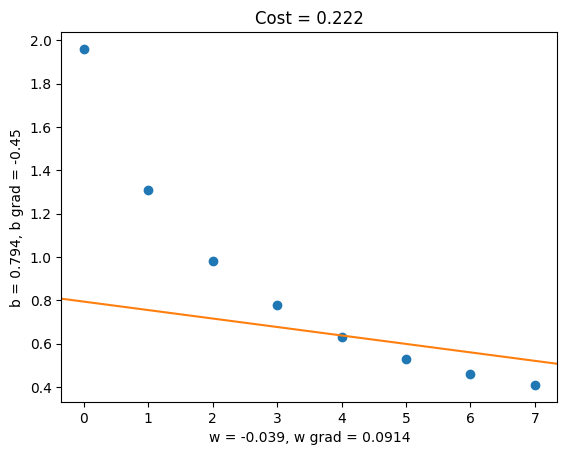

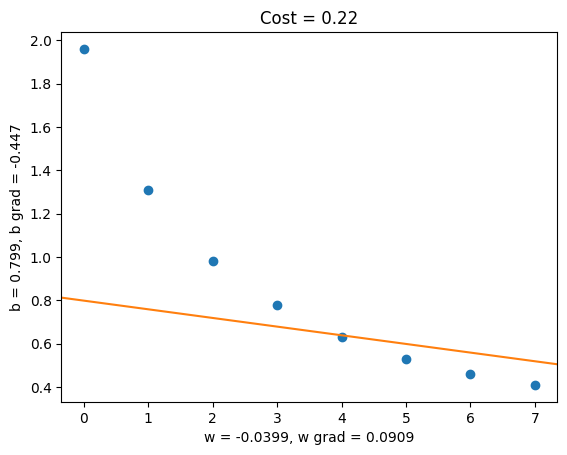

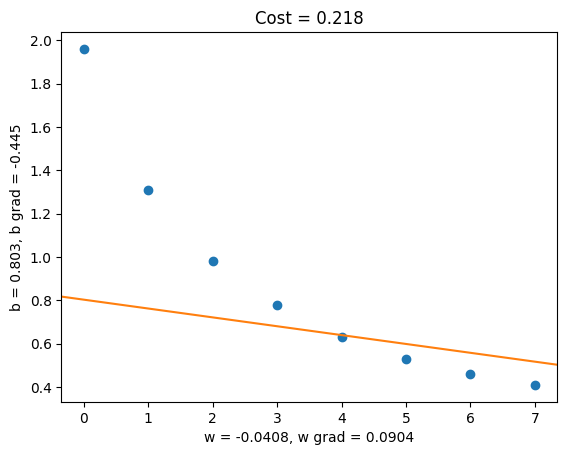

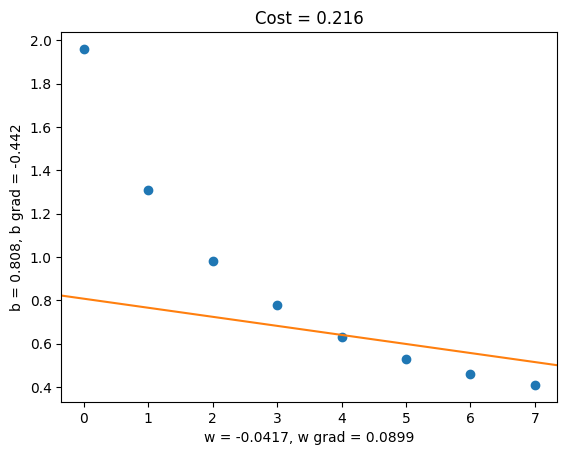

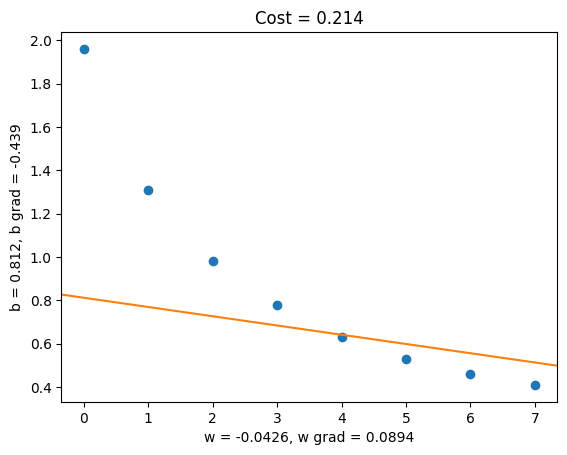

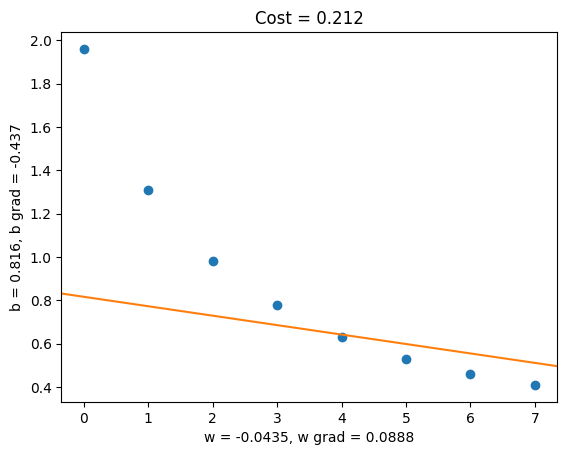

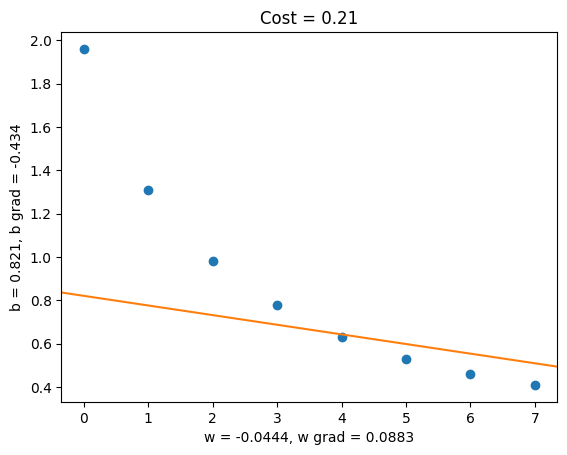

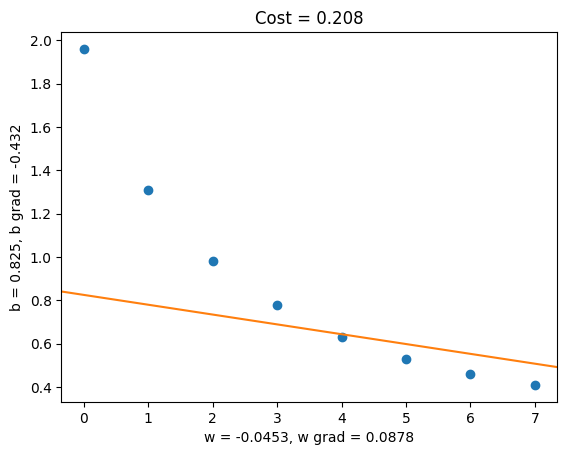

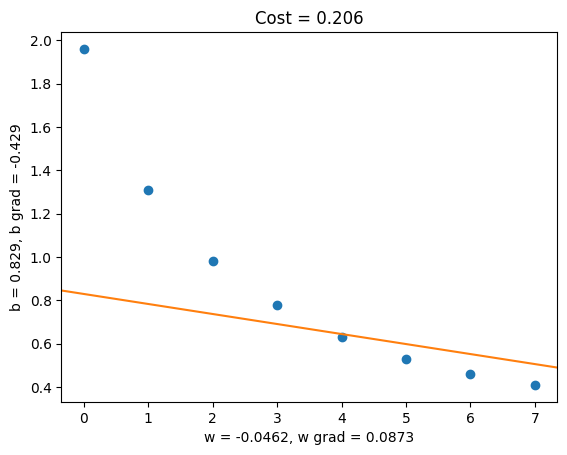

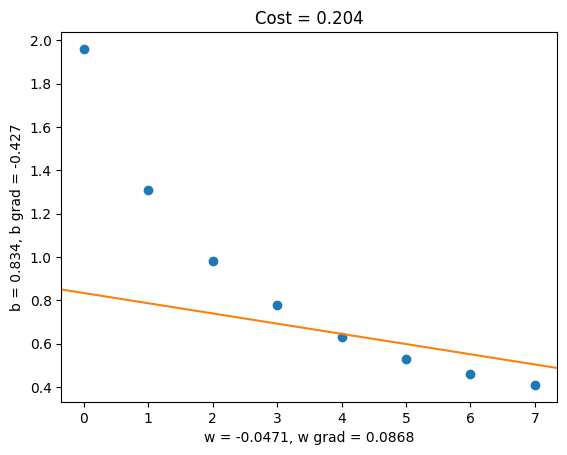

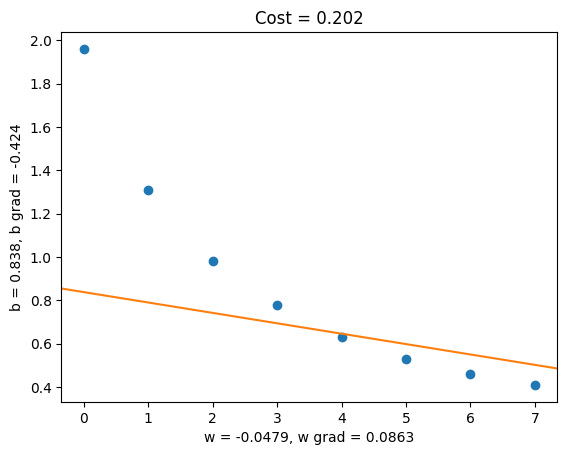

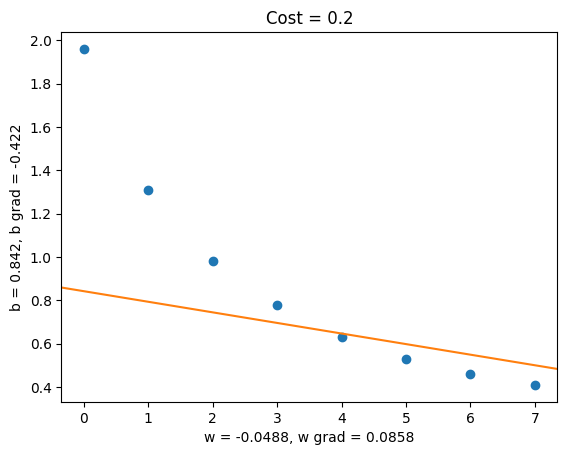

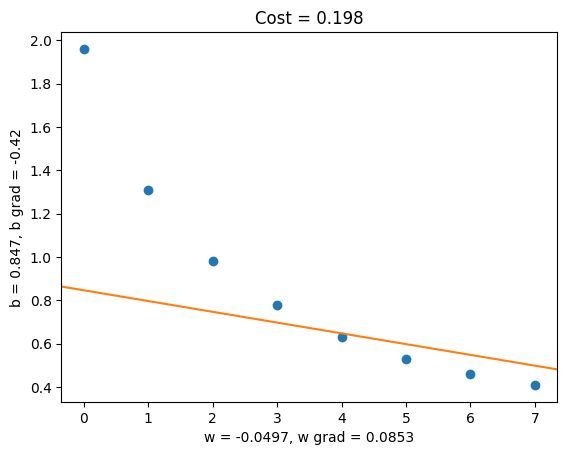

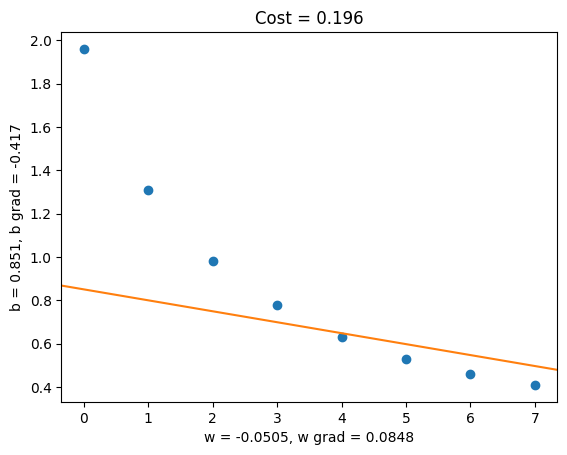

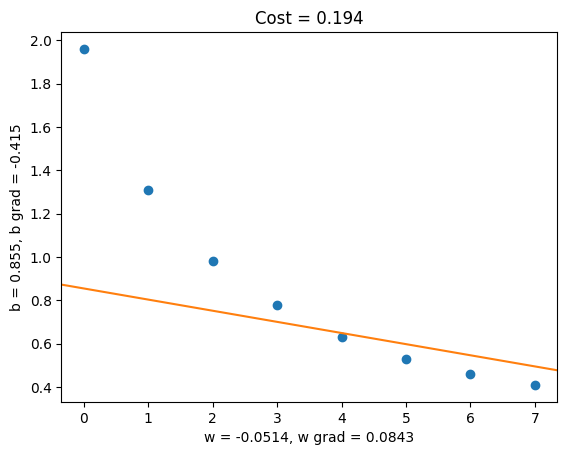

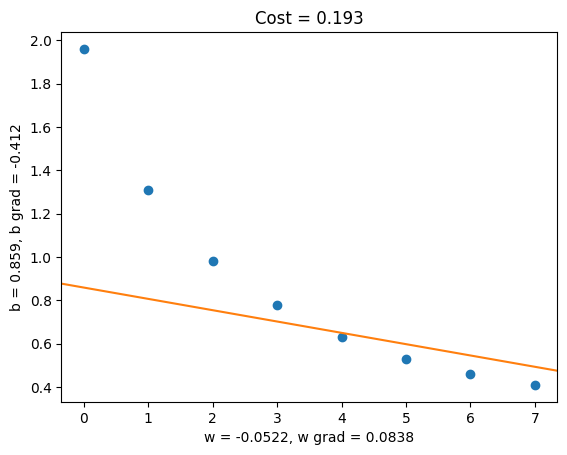

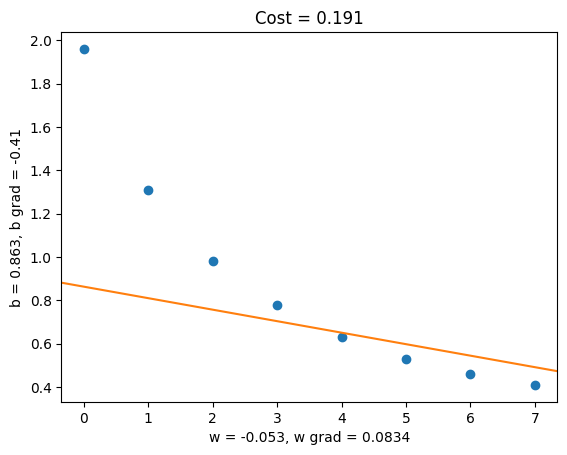

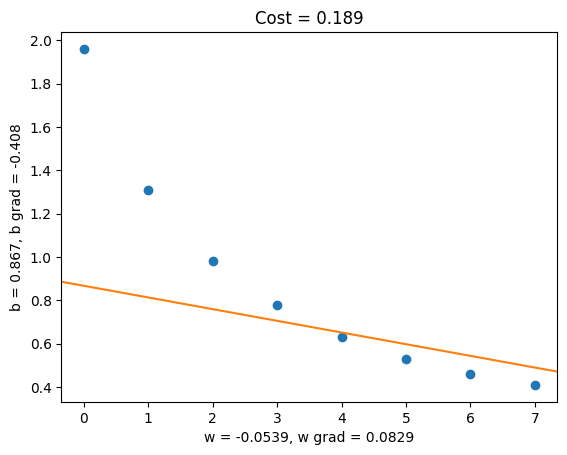

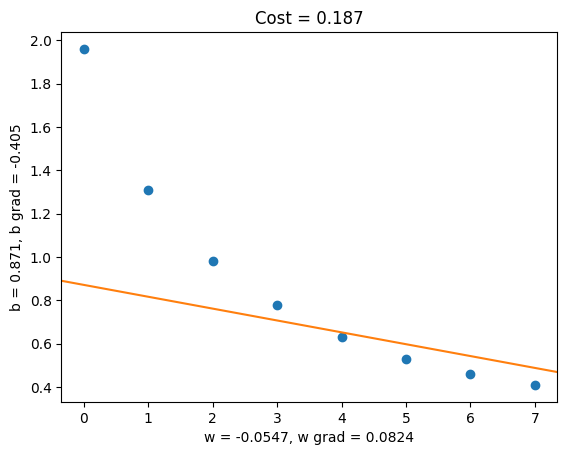

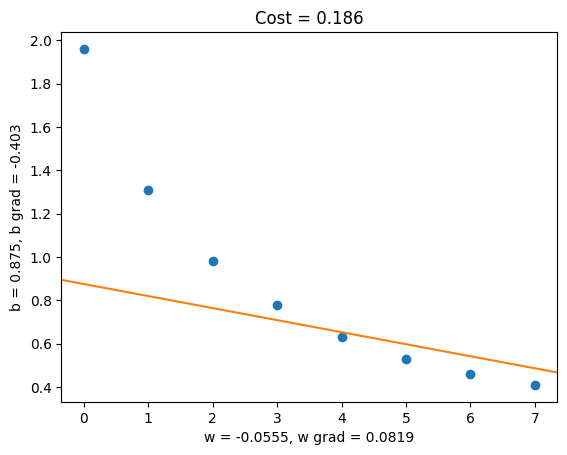

In [141]:
b.requires_grad_()
_ = w.requires_grad_()

epochs = 100
for epoch in range(epochs):
    yhats = regression(xs,w,b)
    C= mse(yhats, ys)
    C.backward()
    print("Epoch {}: Cost = {}, w = {}, b = {}".format(epoch, C.item(), w.item(), b.item()))
    labeled_regression_plot(xs, ys, w, b, C)
    gradient = torch.tensor([[b.grad.item(), w.grad.item()]]).T
    theta = torch.tensor([[b,w]]).T
    new_theta = theta - lr*gradient
    b= new_theta[0].requires_grad_()
    w= new_theta[1].requires_grad_()    
    